In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
# Files to load
city_data_to_load = os.path.join("city_data.csv")
ride_data_to_load = os.path.join("ride_data.csv")

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
city_data_df.notnull().sum()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"] == "Urban")

66

In [10]:
# Get the number of data points from the Rural cities.
print(sum(city_data_df["type"] == "Rural"))
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"] == "Suburban")

18


36

In [11]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=["city", "city"], how="left")

# Display the DataFrame
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [15]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df.loc[(pyber_data_df["type"] == "Urban")]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df.loc[(pyber_data_df["type"] == "Suburban")]

# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df.loc[(pyber_data_df["type"] == "Rural")]

In [17]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby("city").count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [18]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby("city").count()["ride_id"]
rural_ride_count = rural_cities_df.groupby("city").count()["ride_id"]

In [19]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby("city").mean()["fare"]
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [20]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby("city").mean()["fare"]
rural_avg_fare = rural_cities_df.groupby("city").mean()["fare"]

In [21]:
# Get average number of drivers for each city in the urban cities.
urban_driver_count = urban_cities_df.groupby("city").mean()["driver_count"]
urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [22]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby("city").mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby("city").mean()["driver_count"]

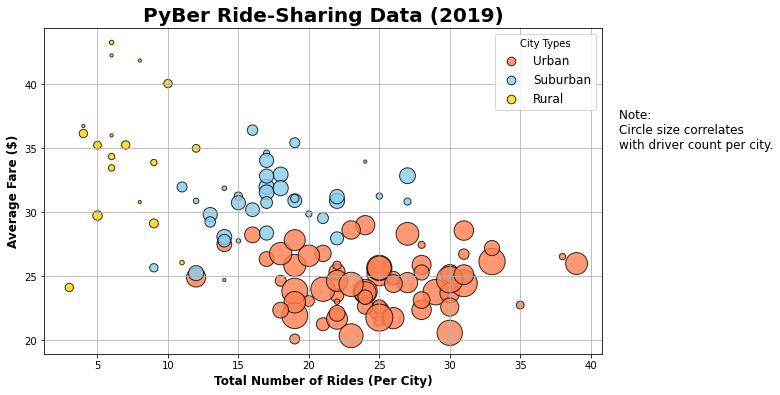

In [24]:
# Add the scatter charts for each type of city.
plt.figure(figsize=(10, 6))
# Urban
plt.scatter(urban_ride_count, urban_avg_fare, s=10 * urban_driver_count, color="coral", 
            label="Urban", edgecolor="black", alpha=0.8, linewidth=1)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20, fontweight="bold")
plt.xlabel("Total Number of Rides (Per City)", fontsize=12, fontweight="bold")
plt.ylabel("Average Fare ($)", fontsize=12, fontweight="bold")
#plt.legend()
plt.grid(True)

# Suburban
plt.scatter(suburban_ride_count, suburban_avg_fare, s=10 * suburban_driver_count, color="skyblue", 
            label="Suburban", edgecolor="black", alpha=0.8, linewidth=1)
#plt.legend()

# Rural
plt.scatter(rural_ride_count, rural_avg_fare, s=10 * rural_driver_count, color="gold", 
            label="Rural", edgecolor="black", alpha=0.8, linewidth=1)
#plt.legend()
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: \nCircle size correlates \nwith driver count per city.", fontsize="12")
#plt.tight_layout()

# Save the figure.
plt.savefig("Fig1.png", bbox_inches = "tight")

plt.show()

In [47]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby("type").sum()["fare"]
sum_fares_by_type


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [48]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [49]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [50]:
# Calculate the percentage of fare for each city type.
type_percent = 100 * pyber_data_df.groupby("type").sum()["fare"] / pyber_data_df["fare"].sum()
type_percent

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

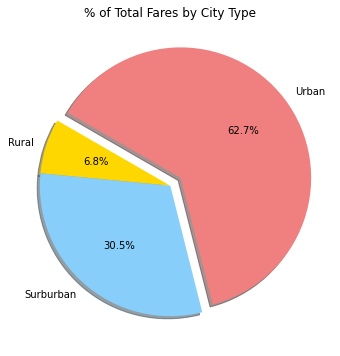

In [51]:
# Import matplotlib
import matplotlib as mpl

# Build the percentage of fares by city type pie chart.
city_types = ["Rural", "Surburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explodes = [0, 0 , 0.1]
plt.subplots(figsize=(10, 6))
plt.pie(type_percent, labels=city_types, 
        autopct="%1.1f%%", colors=colors, 
        startangle=150, shadow=True,
        explode=explodes)
plt.title("% of Total Fares by City Type")
mpl.rcParams["font.size"] = 14

# Save Figure
plt.savefig("Fig2.png")
# Show Figure
plt.show()

In [52]:
pyber_data_df


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [53]:
# Get the percentages of rides per city type
rides_type_percent = 100 * pyber_data_df.groupby("type").count()["ride_id"] / pyber_data_df["ride_id"].count()
rides_type_percent

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

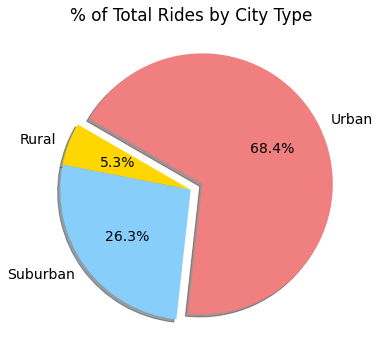

In [54]:
# Create the pie chart
plt.subplots(figsize=(10, 6))
plt.pie(rides_type_percent, labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        autopct="%1.1f%%", explode=[0,0,0.1], shadow=True, 
        startangle=150)
plt.title("% of Total Rides by City Type")
mpl.rcParams["font.size"] = 14
# Save Figure
plt.savefig("Fig3.png")
plt.show()

In [55]:
# Get the percentage of total drivers by city type
drivers_type_percent = 100 * city_data_df.groupby("type").sum()["driver_count"] / city_data_df["driver_count"].sum()
drivers_type_percent

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

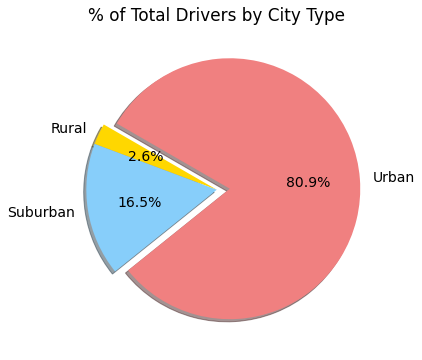

In [57]:
# Create the pie chart of % of Total drivers by city type
plt.subplots(figsize=(10, 6))
plt.pie(drivers_type_percent, labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], autopct="%1.1f%%",
        explode=[0,0,0.1], startangle=150, shadow=True)
plt.title("% of Total Drivers by City Type")
mpl.rcParams["font.size"] = 14
plt.savefig("Fig4.png")
plt.show()